# Implementation Exercise: Regularization in Practice
## Objective
Learn how to implement regularization techniques, such as L1/L2 regularization and Dropout, in neural networks to prevent overfitting.

## Setup
Begin by importing the necessary libraries and preparing a dataset. For simplicity, we'll continue using a synthetic dataset for a binary classification task.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
data['quality'].unique()

array([0, 1], dtype=int64)

In [51]:
# Preprocess the dataset: Predicting wine quality (binary classification: good or bad)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Splitting the data into features and target
X = data.drop('quality', axis=1)
y = data['quality'].values

display(X.head(), y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [52]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

X[:2]

(1279, 11)
(1279,)
(320, 11)
(320,)


array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711]])

## Define the Base Neural Network Model
Create a function to build a simple neural network model without regularization. This will serve as our baseline for comparison.

In [53]:
def build_base_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Implement L1/L2 Regularization
Add L1 and/or L2 regularization to the model. Modify the build_base_model function to include L1/L2 regularization in the dense hidden layers. hint: check the kernel_regularizer parameter in the tf.keras.layers.Dense

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

# TASK: Modify this function to include L1 or L2 regularization
def build_regularized_model(l1=0.01, l2=0.01):
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(20, kernel_regularizer=keras.regularizers.L1L2(l1, l2), activation='relu', input_shape=(11,)),
        tf.keras.layers.Dense(20, kernel_regularizer=keras.regularizers.L1L2(l1, l2), activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


## Implement Dropout
Incorporate Dropout into the neural network. Modify the build_base_model function to add Dropout layers after each hidden layer. hint: tf.keras.layers.Dropout

In [58]:
# TASK: Modify this function to include Dropout
def build_dropout_model(dropout_rate=0.2):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model



## Train and Evaluate Models
Train and evaluate the base model, the regularized model, and the dropout model. Compare their performance.

In [86]:
# Training and evaluation helper function
def train_and_evaluate(model, epochs=500):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.2)
    #test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history#, test_loss, test_accuracy


In [87]:
metrics = {}

# Base model
base_model = build_base_model()
metrics['base'] = train_and_evaluate(base_model)

# Regularized model
regularized_model = build_regularized_model(l1=0.01, l2=0.01)
metrics['l1 & l2'] = train_and_evaluate(regularized_model)

# Dropout model
dropout_model = build_dropout_model(dropout_rate=0.2)
metrics['dropout'] = train_and_evaluate(dropout_model)


Epoch 1/500
32/32 [==============================] - 4s 25ms/step - loss: 0.6726 - accuracy: 0.5894 - val_loss: 0.6139 - val_accuracy: 0.6797
Epoch 2/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6211 - accuracy: 0.6686 - val_loss: 0.5603 - val_accuracy: 0.7656
Epoch 3/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5939 - accuracy: 0.6970 - val_loss: 0.5232 - val_accuracy: 0.7812
Epoch 4/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5772 - accuracy: 0.7058 - val_loss: 0.4977 - val_accuracy: 0.7930
Epoch 5/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5663 - accuracy: 0.7077 - val_loss: 0.4851 - val_accuracy: 0.8047
Epoch 6/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5584 - accuracy: 0.7195 - val_loss: 0.4739 - val_accuracy: 0.8125
Epoch 7/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5519 - accuracy: 0.7195 - val_loss: 0.4686 - val_accuracy: 0.8086
Epoch 8/500


## Visualization and Analysis
Plot the training and validation accuracy of each model to compare their performance.

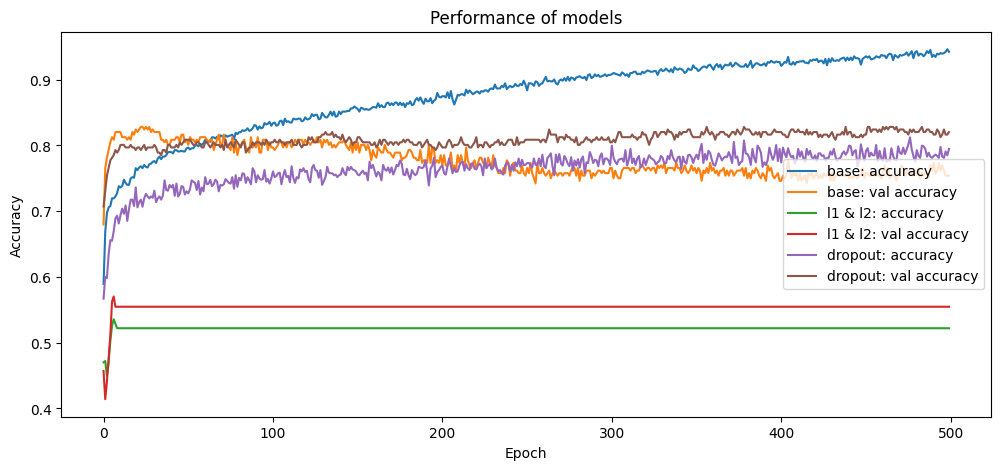

In [93]:
plt.figure(figsize=(12, 5))

# Plot for base model

for model_name, metric in metrics.items():
    plt.plot(metric.history['accuracy'], label=f'{model_name}: accuracy')
    plt.plot(metric.history['val_accuracy'], label=f'{model_name}: val accuracy')

plt.title('Performance of models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Tasks and Questions
1. Implement L1/L2 regularization and Dropout in the provided model structures.
2. Implement the visualizations.
3. Observe the effect of each technique on model performance.
4. Discuss which regularization technique seemed most effective and why.
## Conclusion
Reflect on the importance of regularization techniques in training neural networks and their impact on model performance and generalization